## Image I/O

In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [3]:
# coronal scan of same patient's covid-infected lung showing disease markers

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/601.000000-COR 3X3-86740"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "MIDRC-RICORD-1A_coronal_image.nii")

sitk.WriteImage(image, "MIDRC-RICORD-1A_coronal_image.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")
    
    
covid_example = sitk.ReadImage("./MIDRC-RICORD-1A_coronal_image.nii")

print("Dimensions: " + str(covid_example.GetDimension()))
print("Width: " + str(covid_example.GetWidth()))
print("Height: " + str(covid_example.GetHeight()))
print("Depth: " + str(covid_example.GetDepth()))
print("Pixel ID: " + str(covid_example.GetPixelIDValue()))
print("Pixel Type: " + str(covid_example.GetPixelIDTypeAsString()))
print("Components Per Pixel: " + str(covid_example.GetNumberOfComponentsPerPixel()))

Reading Dicom directory: D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/601.000000-COR 3X3-86740
Image size: 512 512 106
Writing image: MIDRC-RICORD-1A_coronal_image.nii
Dimensions: 3
Width: 512
Height: 512
Depth: 106
Pixel ID: 4
Pixel Type: 32-bit signed integer
Components Per Pixel: 1


In [4]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import SimpleITK as sitk

# Download data to work on
%run update_path_to_download_script
# from downloaddata import fetch_data as fdata
from myshow import myshow, myshow3d
  
# Read the image
dicom_dir = "D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)
image = reader.Execute()

seg = image > 200
myshow(sitk.LabelOverlay(image, seg), "Basic Thresholding")


# To visualize the labels image in RGB with needs a image with 0-255 range
image_rgb = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkUInt8)

Reading Dicom directory: D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100


interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [5]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg = otsu_filter.Execute(image_rgb)
myshow(sitk.LabelOverlay(image_rgb, seg), "Otsu Thresholding")

print(otsu_filter.GetThreshold() )

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

1.0


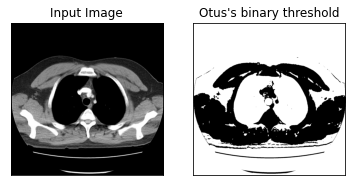

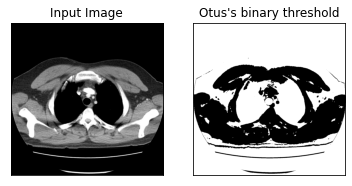

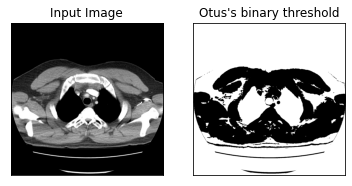

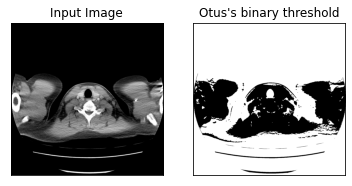

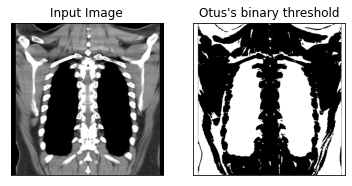

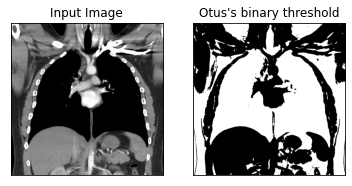

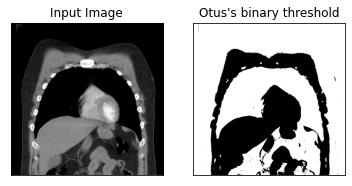

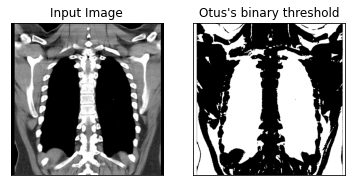

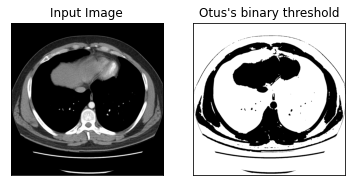

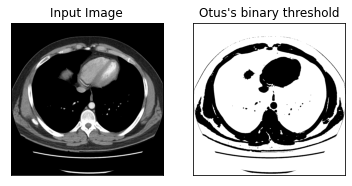

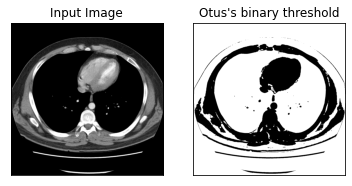

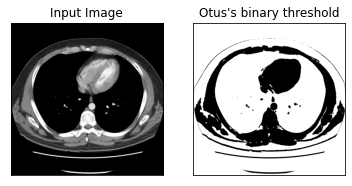

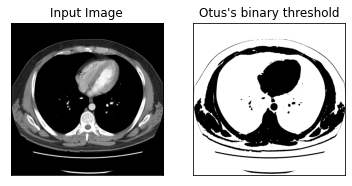

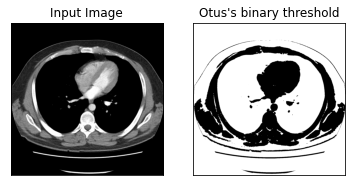

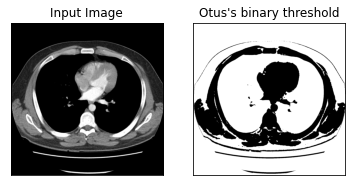

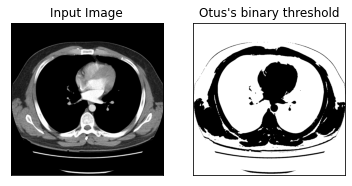

In [23]:
# Using an external viewer (ITK-SNAP or 3D Slicer) we identified a visually appealing window-level setting
T1_WINDOW_LEVEL = (1050, 500)

# image = sitk.ReadImage("NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100")
# Rescale the intensities and map them to [0,255], these are the default values for the output
# We will use this image to display the results of segmentation
img_T1_255 = sitk.Cast(
    sitk.IntensityWindowing(
        image,
        windowMinimum=T1_WINDOW_LEVEL[1] - T1_WINDOW_LEVEL[0] / 2.0,
        windowMaximum=T1_WINDOW_LEVEL[1] + T1_WINDOW_LEVEL[0] / 2.0,
    ),
    sitk.sitkUInt8,
)

#************
#Can read .jpg, .jpe, .jpeg, .png formats
#In my case I tries images of Coronal lung window.zip in our repo
import numpy as np
import cv2
from matplotlib import pyplot as plt



for x in range(16):
    x += 1
    img = cv2.imread("C:/Users/Alan/Desktop/CSC-621-821-Team-Forest-main/comparison/clean/axialc+_clean (" + str(x) + ").jpg")
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    plt.subplot(121),plt.imshow(rgb_img)
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(thresh, 'gray')
    plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
    plt.show()

    cv2.imwrite("C:/Users/Alan/Desktop/CSC-621-821-Team-Forest-main/comparison/clean/threshold/" + str(x) + ".tif", thresh)

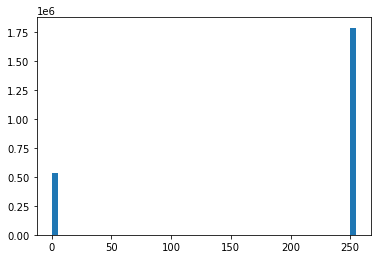

In [20]:
threshImg = sitk.ReadImage("test.tif")

plt.figure()
plt.hist(sitk.GetArrayViewFromImage(threshImg).flatten(), bins=50)
plt.show()

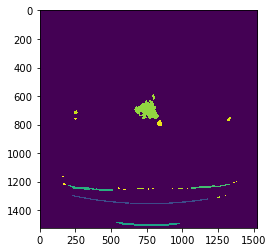

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |      512.0 |     0.8605 |      595.0 | 
 2 |  1.403e+04 |     0.8395 |  1.671e+04 | 
 3 |      619.0 |     0.9246 |      669.5 | 
 4 |      451.0 |     0.9505 |      474.5 | 
 5 |      174.0 |     0.9803 |      177.5 | 
 6 |      1197. |     0.9752 |      1228. | 
 7 |      135.0 |      1.000 |      135.0 | 
 8 |      69.00 |      1.000 |      69.00 | 
 9 |      111.0 |     0.9823 |      113.0 | 
10 |      222.0 |     0.9933 |      223.5 | 
11 |      2831. |     0.7055 |      4012. | 
12 |      3974. |     0.6336 |      6272. | 
13 |      129.0 |     0.9923 |      130.0 | 
14 |      69.00 |      1.000 |      69.00 | 
15 |      419.0 |     0.9001 |      465.5 | 
16 |      303.0 |     0.8925 |      339.5 | 
17 |      69.00 |      1.000 |      69.00 | 
18 |      

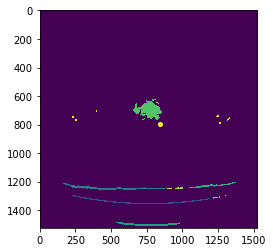

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  1.559e+04 |     0.7321 |  2.129e+04 | 
 2 |      224.0 |     0.9218 |      243.0 | 
 3 |      103.0 |     0.9856 |      104.5 | 
 4 |      252.0 |     0.9825 |      256.5 | 
 5 |      195.0 |     0.9898 |      197.0 | 
 6 |      320.0 |     0.8877 |      360.5 | 
 7 |      175.0 |     0.7778 |      225.0 | 
 8 |      229.0 |     0.9807 |      233.5 | 
 9 |      231.0 |     0.9665 |      239.0 | 
10 |      974.0 |     0.9828 |      991.0 | 
11 |      3749. |     0.6554 |      5720. | 
12 |      8923. |     0.4293 |  2.078e+04 | 
13 |      527.0 |     0.8514 |      619.0 | 
14 |      274.0 |     0.9580 |      286.0 | 
15 |      8651. |     0.2262 |  3.824e+04 | 
16 |      78.00 |      1.000 |      78.00 | 
17 |      351.0 |     0.7888 |      445.0 | 
18 |      

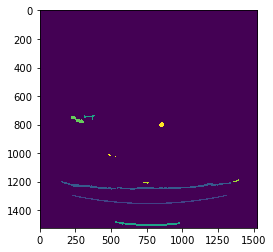

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |      1105. |     0.5651 |      1956. | 
 2 |      1763. |     0.7602 |      2319. | 
 3 |      917.0 |     0.9855 |      930.5 | 
 4 |      169.0 |     0.9685 |      174.5 | 
 5 |      79.00 |     0.9693 |      81.50 | 
 6 |      379.0 |     0.8441 |      449.0 | 
 7 |  1.493e+04 |     0.2829 |  5.278e+04 | 
 8 |      333.0 |     0.8916 |      373.5 | 
 9 |      9975. |     0.1946 |  5.125e+04 | 
10 |      6286. |     0.5679 |  1.107e+04 | 



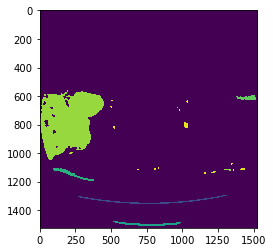

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  1.420e+05 |     0.8548 |  1.662e+05 | 
 2 |      3261. |     0.7627 |      4276. | 
 3 |      85.00 |      1.000 |      85.00 | 
 4 |      213.0 |     0.9816 |      217.0 | 
 5 |      159.0 |     0.9755 |      163.0 | 
 6 |      74.00 |     0.8605 |      86.00 | 
 7 |      69.00 |      1.000 |      69.00 | 
 8 |      990.0 |     0.9640 |      1027. | 
 9 |      280.0 |     0.9722 |      288.0 | 
10 |      369.0 |     0.8978 |      411.0 | 
11 |      179.0 |     0.9890 |      181.0 | 
12 |      114.0 |     0.9744 |      117.0 | 
13 |      5303. |     0.6372 |      8322. | 
14 |      177.0 |     0.9752 |      181.5 | 
15 |      444.0 |     0.9457 |      469.5 | 
16 |      516.0 |     0.8501 |      607.0 | 
17 |      69.00 |      1.000 |      69.00 | 
18 |      

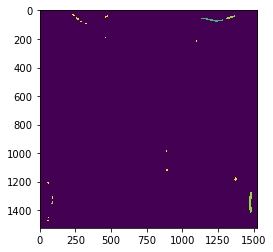

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |      183.0 |     0.9786 |      187.0 | 
 2 |      739.0 |     0.8470 |      872.5 | 
 3 |      242.0 |     0.9490 |      255.0 | 
 4 |      203.0 |     0.9312 |      218.0 | 
 5 |      1594. |     0.6747 |      2362. | 
 6 |      130.0 |     0.9630 |      135.0 | 
 7 |      87.00 |      1.000 |      87.00 | 
 8 |      91.00 |     0.9529 |      95.50 | 
 9 |      164.0 |     0.9820 |      167.0 | 
10 |      78.00 |      1.000 |      78.00 | 
11 |      192.0 |     0.9648 |      199.0 | 
12 |      343.0 |     0.9541 |      359.5 | 
13 |      184.0 |     0.9813 |      187.5 | 
14 |      2006. |     0.8416 |      2384. | 
15 |      193.0 |     0.9772 |      197.5 | 
16 |      160.0 |     0.8247 |      194.0 | 
17 |      78.00 |      1.000 |      78.00 | 
18 |      

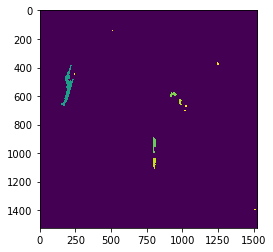

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |      69.00 |      1.000 |      69.00 | 
 2 |      272.0 |     0.9837 |      276.5 | 
 3 |      7341. |     0.5624 |  1.305e+04 | 
 4 |      168.0 |     0.9739 |      172.5 | 
 5 |      1003. |     0.8082 |      1241. | 
 6 |      635.0 |     0.8912 |      712.5 | 
 7 |      170.0 |     0.9884 |      172.0 | 
 8 |      85.00 |      1.000 |      85.00 | 
 9 |      1677. |     0.7701 |      2178. | 
10 |      1192. |     0.9106 |      1309. | 
11 |      78.00 |      1.000 |      78.00 | 



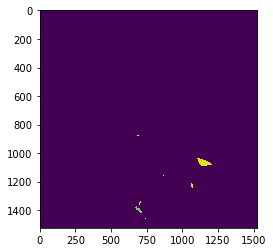

  |       Size |   Solidity | ConvexArea | 
- | ---------- | ---------- | ---------- | 
  |            |            |            | 
  |     (px^2) |            |     (px^2) | 
- | ---------- | ---------- | ---------- | 
1 |      88.00 |     0.9944 |      88.50 | 
2 |      3302. |     0.9444 |      3496. | 
3 |      84.00 |     0.9545 |      88.00 | 
4 |      465.0 |     0.9442 |      492.5 | 
5 |      282.0 |     0.8812 |      320.0 | 
6 |      855.0 |     0.7823 |      1093. | 
7 |      79.00 |     0.9693 |      81.50 | 



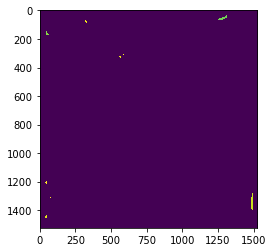

  |       Size |   Solidity | ConvexArea | 
- | ---------- | ---------- | ---------- | 
  |            |            |            | 
  |     (px^2) |            |     (px^2) | 
- | ---------- | ---------- | ---------- | 
1 |      968.0 |     0.7951 |      1218. | 
2 |      227.0 |     0.9806 |      231.5 | 
3 |      348.0 |     0.8266 |      421.0 | 
4 |      69.00 |      1.000 |      69.00 | 
5 |      98.00 |     0.9655 |      101.5 | 
6 |      180.0 |      1.000 |      180.0 | 
7 |      1547. |     0.9219 |      1678. | 
8 |      78.00 |      1.000 |      78.00 | 
9 |      257.0 |     0.9590 |      268.0 | 



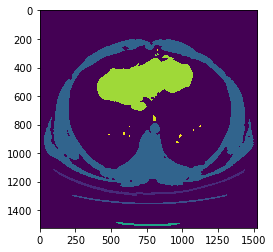

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  3.792e+05 |     0.3244 |  1.169e+06 | 
 2 |      149.0 |     0.9739 |      153.0 | 
 3 |      284.0 |     0.8161 |      348.0 | 
 4 |  1.509e+05 |     0.8621 |  1.750e+05 | 
 5 |      855.0 |     0.9396 |      910.0 | 
 6 |      99.00 |      1.000 |      99.00 | 
 7 |      103.0 |      1.000 |      103.0 | 
 8 |      100.0 |      1.000 |      100.0 | 
 9 |      274.0 |     0.9874 |      277.5 | 
10 |      101.0 |     0.9951 |      101.5 | 
11 |      310.0 |     0.9904 |      313.0 | 
12 |      78.00 |      1.000 |      78.00 | 
13 |      257.0 |     0.9790 |      262.5 | 
14 |  2.155e+04 |     0.1236 |  1.744e+05 | 
15 |  1.305e+04 |     0.2363 |  5.521e+04 | 
16 |      6226. |     0.5812 |  1.071e+04 | 



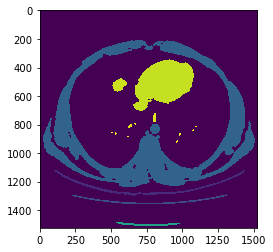

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  3.721e+05 |     0.3198 |  1.164e+06 | 
 2 |  9.979e+04 |     0.9176 |  1.088e+05 | 
 3 |      6317. |     0.9274 |      6812. | 
 4 |      1418. |     0.9571 |      1482. | 
 5 |      121.0 |     0.9918 |      122.0 | 
 6 |      486.0 |     0.9643 |      504.0 | 
 7 |      107.0 |      1.000 |      107.0 | 
 8 |      138.0 |     0.9753 |      141.5 | 
 9 |      78.00 |      1.000 |      78.00 | 
10 |      217.0 |     0.9819 |      221.0 | 
11 |      251.0 |     0.9843 |      255.0 | 
12 |      116.0 |      1.000 |      116.0 | 
13 |      208.0 |     0.9928 |      209.5 | 
14 |  2.048e+04 |     0.1211 |  1.692e+05 | 
15 |  1.294e+04 |     0.2352 |  5.500e+04 | 
16 |      6220. |     0.5831 |  1.067e+04 | 



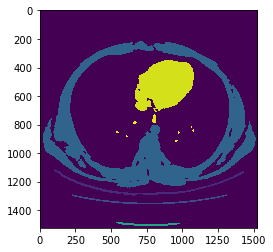

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  3.761e+05 |     0.3233 |  1.163e+06 | 
 2 |  1.096e+05 |     0.9372 |  1.170e+05 | 
 3 |      1468. |     0.9633 |      1524. | 
 4 |      456.0 |     0.9870 |      462.0 | 
 5 |      117.0 |     0.9957 |      117.5 | 
 6 |      232.0 |     0.9915 |      234.0 | 
 7 |      214.0 |     0.9862 |      217.0 | 
 8 |      225.0 |     0.9847 |      228.5 | 
 9 |      123.0 |     0.9880 |      124.5 | 
10 |      250.0 |     0.9881 |      253.0 | 
11 |  2.035e+04 |     0.1199 |  1.698e+05 | 
12 |  1.288e+04 |     0.2324 |  5.543e+04 | 
13 |      6219. |     0.5855 |  1.062e+04 | 



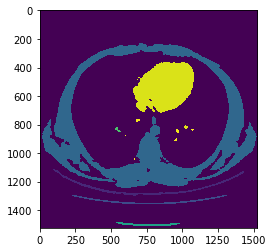

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  3.894e+05 |     0.3341 |  1.165e+06 | 
 2 |  1.128e+05 |     0.9462 |  1.192e+05 | 
 3 |      459.0 |     0.9882 |      464.5 | 
 4 |      547.0 |     0.9571 |      571.5 | 
 5 |      598.0 |     0.7209 |      829.5 | 
 6 |      179.0 |      1.000 |      179.0 | 
 7 |      504.0 |     0.9777 |      515.5 | 
 8 |      102.0 |      1.000 |      102.0 | 
 9 |      325.0 |     0.9863 |      329.5 | 
10 |      92.00 |      1.000 |      92.00 | 
11 |  1.945e+04 |     0.1129 |  1.723e+05 | 
12 |  1.256e+04 |     0.2307 |  5.446e+04 | 
13 |      6082. |     0.5782 |  1.052e+04 | 



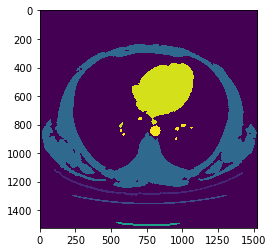

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  3.965e+05 |     0.3405 |  1.164e+06 | 
 2 |  1.197e+05 |     0.9328 |  1.283e+05 | 
 3 |      513.0 |     0.9790 |      524.0 | 
 4 |      607.0 |     0.9100 |      667.0 | 
 5 |      725.0 |     0.9699 |      747.5 | 
 6 |      4233. |     0.9845 |      4300. | 
 7 |      590.0 |     0.9768 |      604.0 | 
 8 |      217.0 |     0.9709 |      223.5 | 
 9 |      285.0 |     0.9744 |      292.5 | 
10 |      249.0 |     0.9940 |      250.5 | 
11 |      316.0 |     0.9798 |      322.5 | 
12 |  1.855e+04 |     0.1098 |  1.689e+05 | 
13 |  1.237e+04 |     0.2270 |  5.450e+04 | 
14 |      5989. |     0.5653 |  1.060e+04 | 



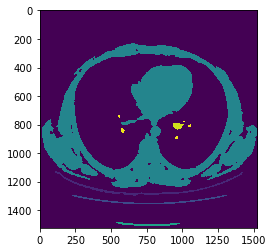

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  5.323e+05 |     0.4554 |  1.169e+06 | 
 2 |      223.0 |     0.9889 |      225.5 | 
 3 |      95.00 |      1.000 |      95.00 | 
 4 |      2631. |     0.9302 |      2828. | 
 5 |      353.0 |     0.9847 |      358.5 | 
 6 |      655.0 |     0.9740 |      672.5 | 
 7 |      377.0 |     0.9805 |      384.5 | 
 8 |  1.812e+04 |     0.1127 |  1.608e+05 | 
 9 |  1.234e+04 |     0.2274 |  5.428e+04 | 
10 |      6042. |     0.5735 |  1.054e+04 | 



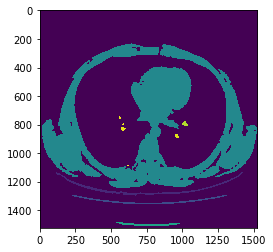

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  5.490e+05 |     0.4654 |  1.180e+06 | 
 2 |      264.0 |     0.9688 |      272.5 | 
 3 |      1016. |     0.8839 |      1150. | 
 4 |      114.0 |     0.9785 |      116.5 | 
 5 |      651.0 |     0.9659 |      674.0 | 
 6 |      604.0 |     0.9549 |      632.5 | 
 7 |      91.00 |     0.9945 |      91.50 | 
 8 |  1.806e+04 |     0.1150 |  1.570e+05 | 
 9 |  1.244e+04 |     0.2297 |  5.416e+04 | 
10 |      6054. |     0.5797 |  1.044e+04 | 



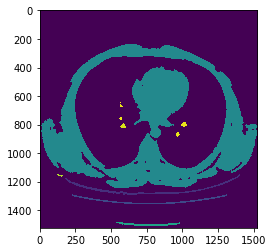

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  5.581e+05 |     0.4738 |  1.178e+06 | 
 2 |      69.00 |      1.000 |      69.00 | 
 3 |      275.0 |     0.9683 |      284.0 | 
 4 |      328.0 |     0.9791 |      335.0 | 
 5 |      922.0 |     0.9710 |      949.5 | 
 6 |      993.0 |     0.9430 |      1053. | 
 7 |      637.0 |     0.9696 |      657.0 | 
 8 |      415.0 |     0.8868 |      468.0 | 
 9 |  1.670e+04 |     0.1344 |  1.243e+05 | 
10 |  1.202e+04 |     0.2177 |  5.519e+04 | 
11 |      6164. |     0.5817 |  1.060e+04 | 



In [28]:
import diplib as dip

for x in range (16):
    x +=1
    thresh = dip.ImageRead("C:/Users/Alan/Desktop/CSC-621-821-Team-Forest-main/comparison/clean/threshold/" + str(x) + ".tif")
    thresh.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1,"px")))

    thresh = dip.ColorSpaceManager.Convert(thresh, 'gray')
    #a.Show()


    obj = ~dip.Threshold(dip.Gauss(thresh))[0]
    obj = dip.EdgeObjectsRemove(obj)
    #obj.Show()


    obj = dip.Opening(dip.Closing(thresh,9),9)
    #obj.Show()
    
    newThresh = obj < 120
    newThresh = dip.EdgeObjectsRemove(newThresh)
    newThresh = dip.Label(newThresh, minSize=30)
    m = dip.MeasurementTool.Measure(newThresh, obj, ['Size', 'Solidity'])

    c = dip.ObjectToMeasurement(newThresh, m['Solidity'])
    c.Show(colormap='viridis')

    print(m)
